In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

import statsmodels as sm

In [2]:
#Load and read Ames Housing Dataset (both train and test datasets)
traindata=pd.read_csv("train.csv",index_col=0,encoding="utf-8")
testdata=pd.read_csv("test.csv",index_col=0,encoding="utf-8")

In [3]:
traindata.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
           dtype='int64', name='Id', length=1460)

In [4]:
#printing the number of columns and rows in train data
traindata.shape

(1460, 80)

In [5]:
#printing the number of columns and rows in test data
testdata.shape

(1459, 79)

In [6]:
testdata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
#printing all column names and their datatypes in traindata
#for col in traindata:
    #print(col.dtypes)
#traindata.dtypes 

In [8]:
#Exploring the names of all the columns
traindata.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [9]:
#Determining the least and most expensive home sold
print("The cheapest price is ${:,.0f}".format(traindata.SalePrice.min()))
print("The most expensive price is ${:,.0f}".format(traindata.SalePrice.max()))

The cheapest price is $34,900
The most expensive price is $755,000


In [10]:
#Plotting the mean and median price of the sold home
print("The average sold price is ${:,.0f}".format(traindata.SalePrice.mean()))
print("The median sold price is ${:,.0f}".format(traindata.SalePrice.median()))

The average sold price is $180,921
The median sold price is $163,000


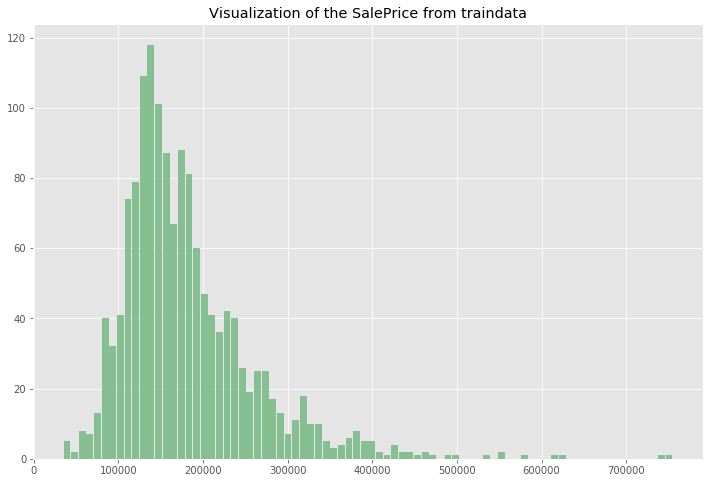

In [11]:
traindata.SalePrice.hist(bins=80, figsize=(12,8), color='#86bf91',rwidth=0.9)
plt.title("Visualization of the SalePrice from traindata")
plt.show()

The first home was built in the year 1872
The most recent home was built in the year 2010


<function matplotlib.pyplot.show(*args, **kw)>

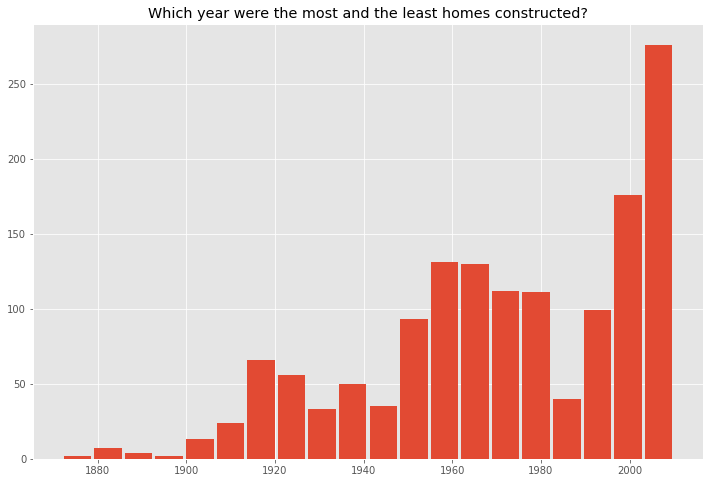

In [12]:
#Visualizing the year the maximum or the minimum number of homes built
print("The first home was built in the year", traindata.YearBuilt.min())
print("The most recent home was built in the year",traindata.YearBuilt.max())
traindata.YearBuilt.hist(bins=20, figsize=(12,8), rwidth=0.9)
plt.title("Which year were the most and the least homes constructed?")
plt.show

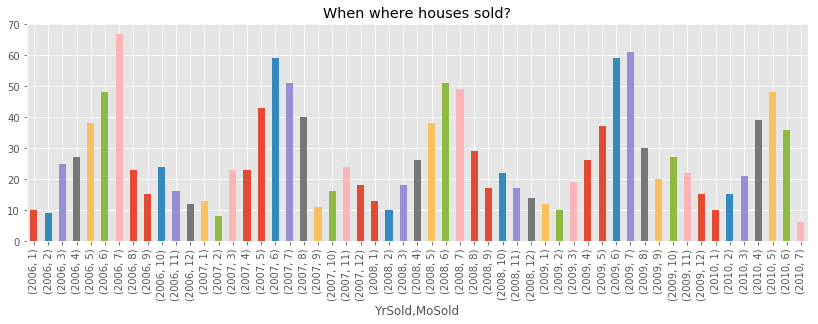

In [13]:
#Visualizing...When were homes sold?MoSold,YrSold

plotbymonthyear = traindata.groupby(['YrSold','MoSold']).apply(lambda x: x.shape[0])
plotbymonthyear.plot(kind='bar',figsize=(14,4))
plt.title('When where houses sold?')
plt.show()




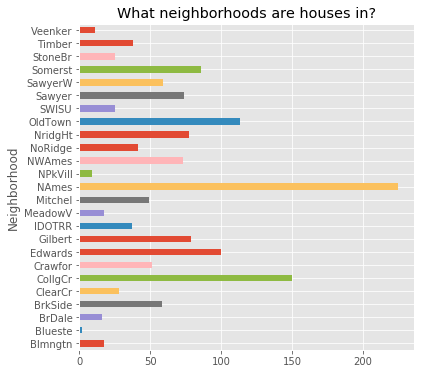

In [14]:
#Which neighborhoods had the most sales? 

plotbyneighborhood=traindata.groupby('Neighborhood').apply(lambda x: x.shape[0])
plotbyneighborhood.plot(kind='barh', figsize=(6,6))
plt.title('What neighborhoods are houses in?')
plt.show()

The largest square footage home sold was 5,642 sq ft and the smallest square footage home sold was 334 sq ft.
The average square footage of a sold home was 1,515 sq ft
The median square footage of a sold home was 1,464 sq ft


<function matplotlib.pyplot.show(*args, **kw)>

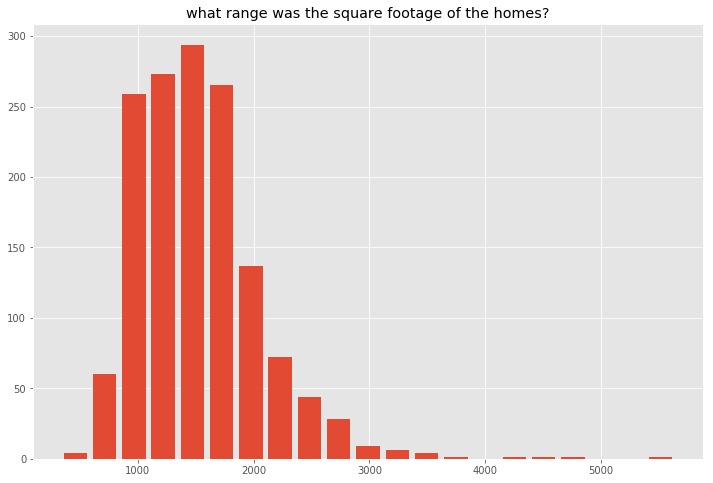

In [15]:
#We all know that the square footage of the home has a strong correlation with the price, lets look for it in this dataset
print("The largest square footage home sold was {:,.0f} sq ft and the smallest square footage home sold was {:,.0f} sq ft.".format(traindata.GrLivArea.max(),traindata.GrLivArea.min()))
print("The average square footage of a sold home was {:,.0f} sq ft".format(traindata.GrLivArea.mean()))
print("The median square footage of a sold home was {:,.0f} sq ft".format(traindata.GrLivArea.median()))
traindata.GrLivArea.hist(bins=21, rwidth=.8, figsize=(12,8))
plt.title("what range was the square footage of the homes?")
plt.show

The average lot size of the sold home is 10,517 sq ft
The median lot size of the sold home is 9,478 sq ft
The biggest lot size of the sold home is 215,245 sq ft
The smallest lot size of the sold home is 1,300 sq ft


<function matplotlib.pyplot.show(*args, **kw)>

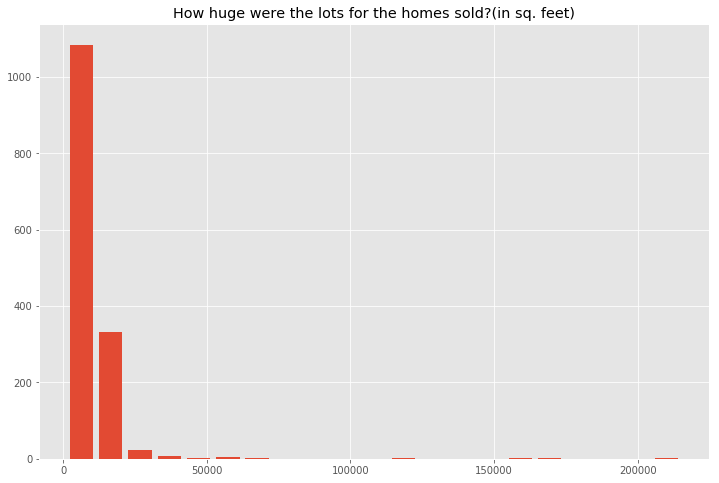

In [16]:
#The buyers also take into account the lot size of the property, lets take a look at it.
print("The average lot size of the sold home is {:,.0f} sq ft".format(traindata.LotArea.mean()))
print("The median lot size of the sold home is {:,.0f} sq ft".format(traindata.LotArea.median()))
print("The biggest lot size of the sold home is {:,.0f} sq ft".format(traindata.LotArea.max()))
print("The smallest lot size of the sold home is {:,.0f} sq ft".format(traindata.LotArea.min()))
traindata.LotArea.hist(bins=21, rwidth=.8, figsize=(12,8))
plt.title("How huge were the lots for the homes sold?(in sq. feet)")
plt.show
#We see that the lotsize and the home size are positively skewed. The lot size is skewed to a larger extent with outliers.

# Univariate Analysis

In [17]:
#For traindata set
def categorize_feature_groups():
    """ Returns a list of numerical and categorical features,
    excluding SalePrice"""
    # Numerical Features
    num_features = traindata.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['SalePrice']) # drop SalePrice

    # Categorical Features
    cat_features = traindata.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

numfeatures,catfeatures=categorize_feature_groups()
#numfeatures
#catfeatures

In [18]:
#For testdata set
def testcategorize_feature_groups():
    """ Returns a list of numerical and categorical features,
    excluding SalePrice"""
    # Numerical Features
    testnum_features = testdata.select_dtypes(include=['int64','float64']).columns
    #testnum_features = testnum_features.drop(['SalePrice']) # drop SalePrice

    # Categorical Features
    testcat_features = testdata.select_dtypes(include=['object']).columns
    return list(testnum_features), list(testcat_features)

testnumfeatures,testcatfeatures=testcategorize_feature_groups()
#testnumfeatures
#testcatfeatures

C:\Users\malco\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


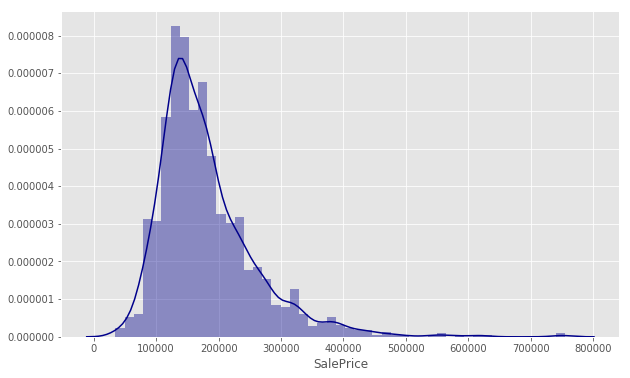

Skew 1.883 
Kurtosis 6.536 


In [19]:
#Plotting the density distribution for the salesprice from the train data
plt.figure(figsize=(10,6))
sns.distplot(traindata.SalePrice,color="darkblue")
plt.show()
print("Skew {:.3f} ".format(traindata.SalePrice.skew()))
print("Kurtosis {:.3f} ".format(traindata.SalePrice.kurtosis()))
#We observe that the salesprice is positively skewed.

In [20]:
#We observe that the it is peaky and fat tail to the right,we can transform it.

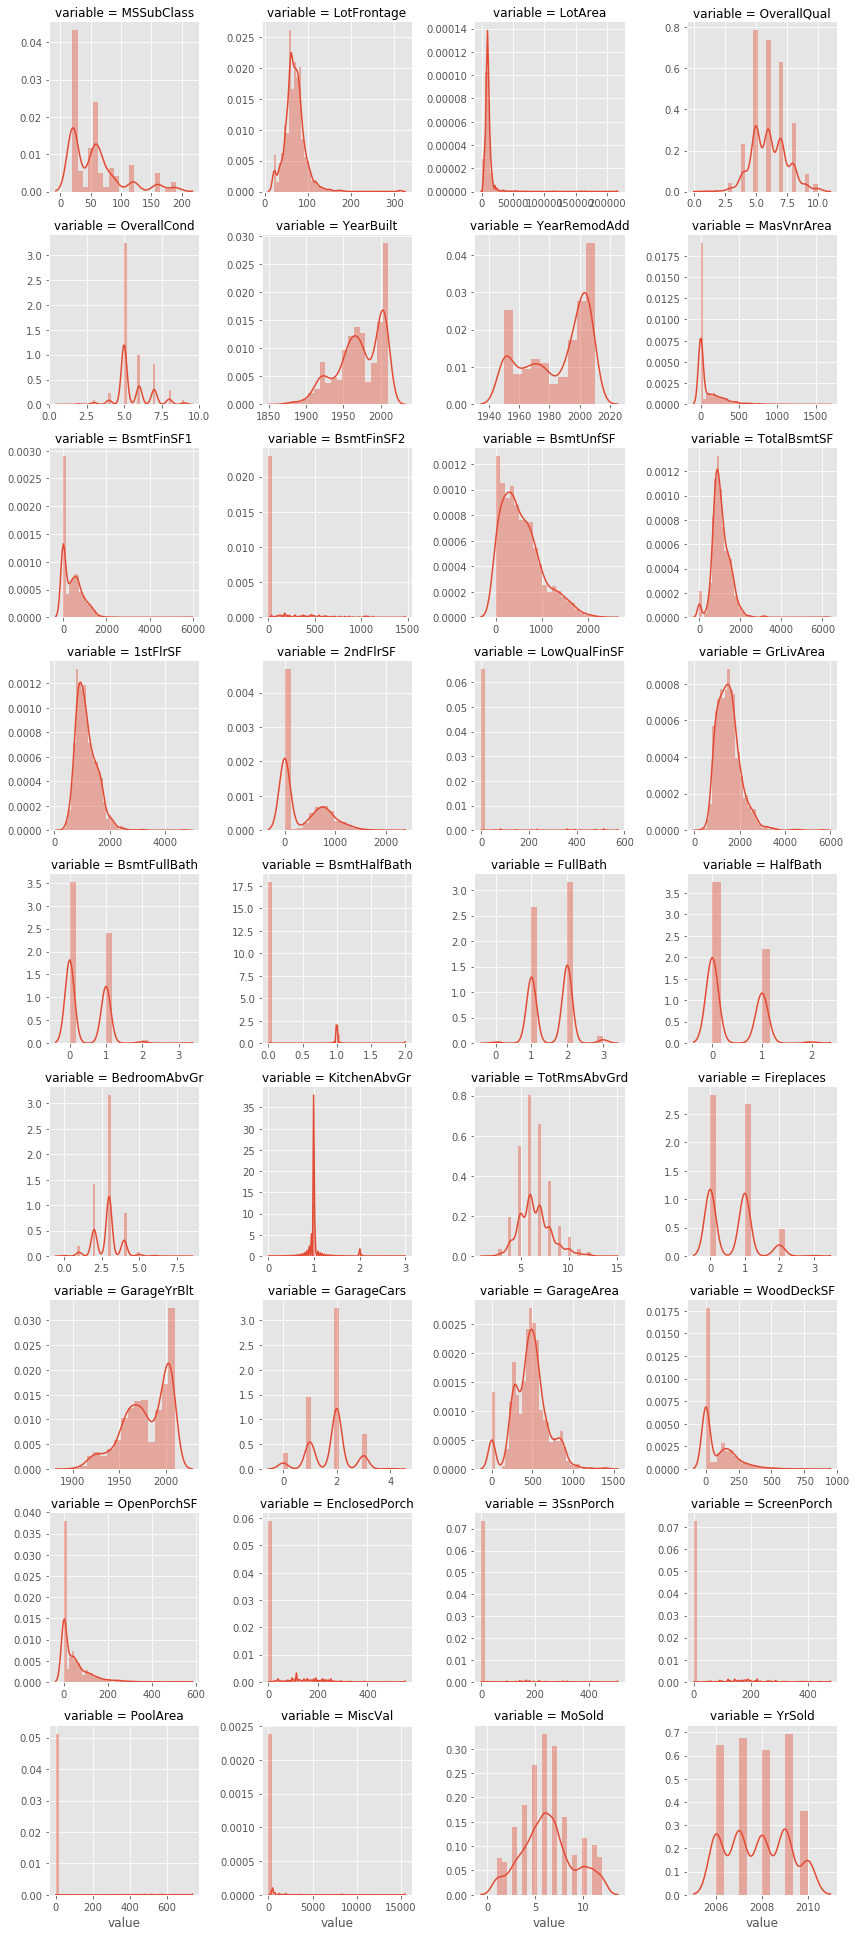

In [21]:
#Checking the normality in each numeric variable, using facetgrid to display pdfs
numvar = pd.melt(traindata, value_vars=numfeatures)
nvar = sns.FacetGrid(numvar, col='variable', col_wrap=4, sharex=False, sharey=False)
nvar = nvar.map(sns.distplot, 'value')


In [22]:
#We observe some of the numeric features are 
#also positively skewed such as LotFrontage, LotArea, BsmtUnfSF, TotalBsmtSF,1stFlrSF, GrLivArea and GarageArea.

#From the above graphs , we observe the sparsity of data(many of these independent variables have a large zero count) in PoolArea, 3SsnPorch, ScreenPorch, MiscVal, LowQualFinSF, 
#EnclosedPorch,BSmtFinSF2,BsmtHalfBath,BsmtFinSF1,OpenPorchSF, BsmtUntSF, GarageArea, 
#TotalBsmtSF,MasVnrArea,2ndFlrSF,WoodDeckSF


In [23]:
#For traindataset Converting 3 numeric variables to categorical variables as they actually function as a class. 
traindata['MSSubClass'] = traindata.MSSubClass.apply(lambda x: str(x))
traindata['MoSold'] = traindata.MoSold.apply(lambda x: str(x))
traindata['YrSold'] = traindata.YrSold.apply(lambda x: str(x))

# Update our list of numerical and categorical features
numfeatures,catfeatures=categorize_feature_groups()


In [24]:
#Replicating for testdata set converting 3 numeric variables to cateegorical variables
testdata['MSSubClass'] = testdata.MSSubClass.apply(lambda x: str(x))
testdata['MoSold'] = testdata.MoSold.apply(lambda x: str(x))
testdata['YrSold'] = testdata.YrSold.apply(lambda x: str(x))

# Update our list of numerical and categorical features
testnumfeatures,testcatfeatures=testcategorize_feature_groups()
#testcatfeatures

C:\Users\malco\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


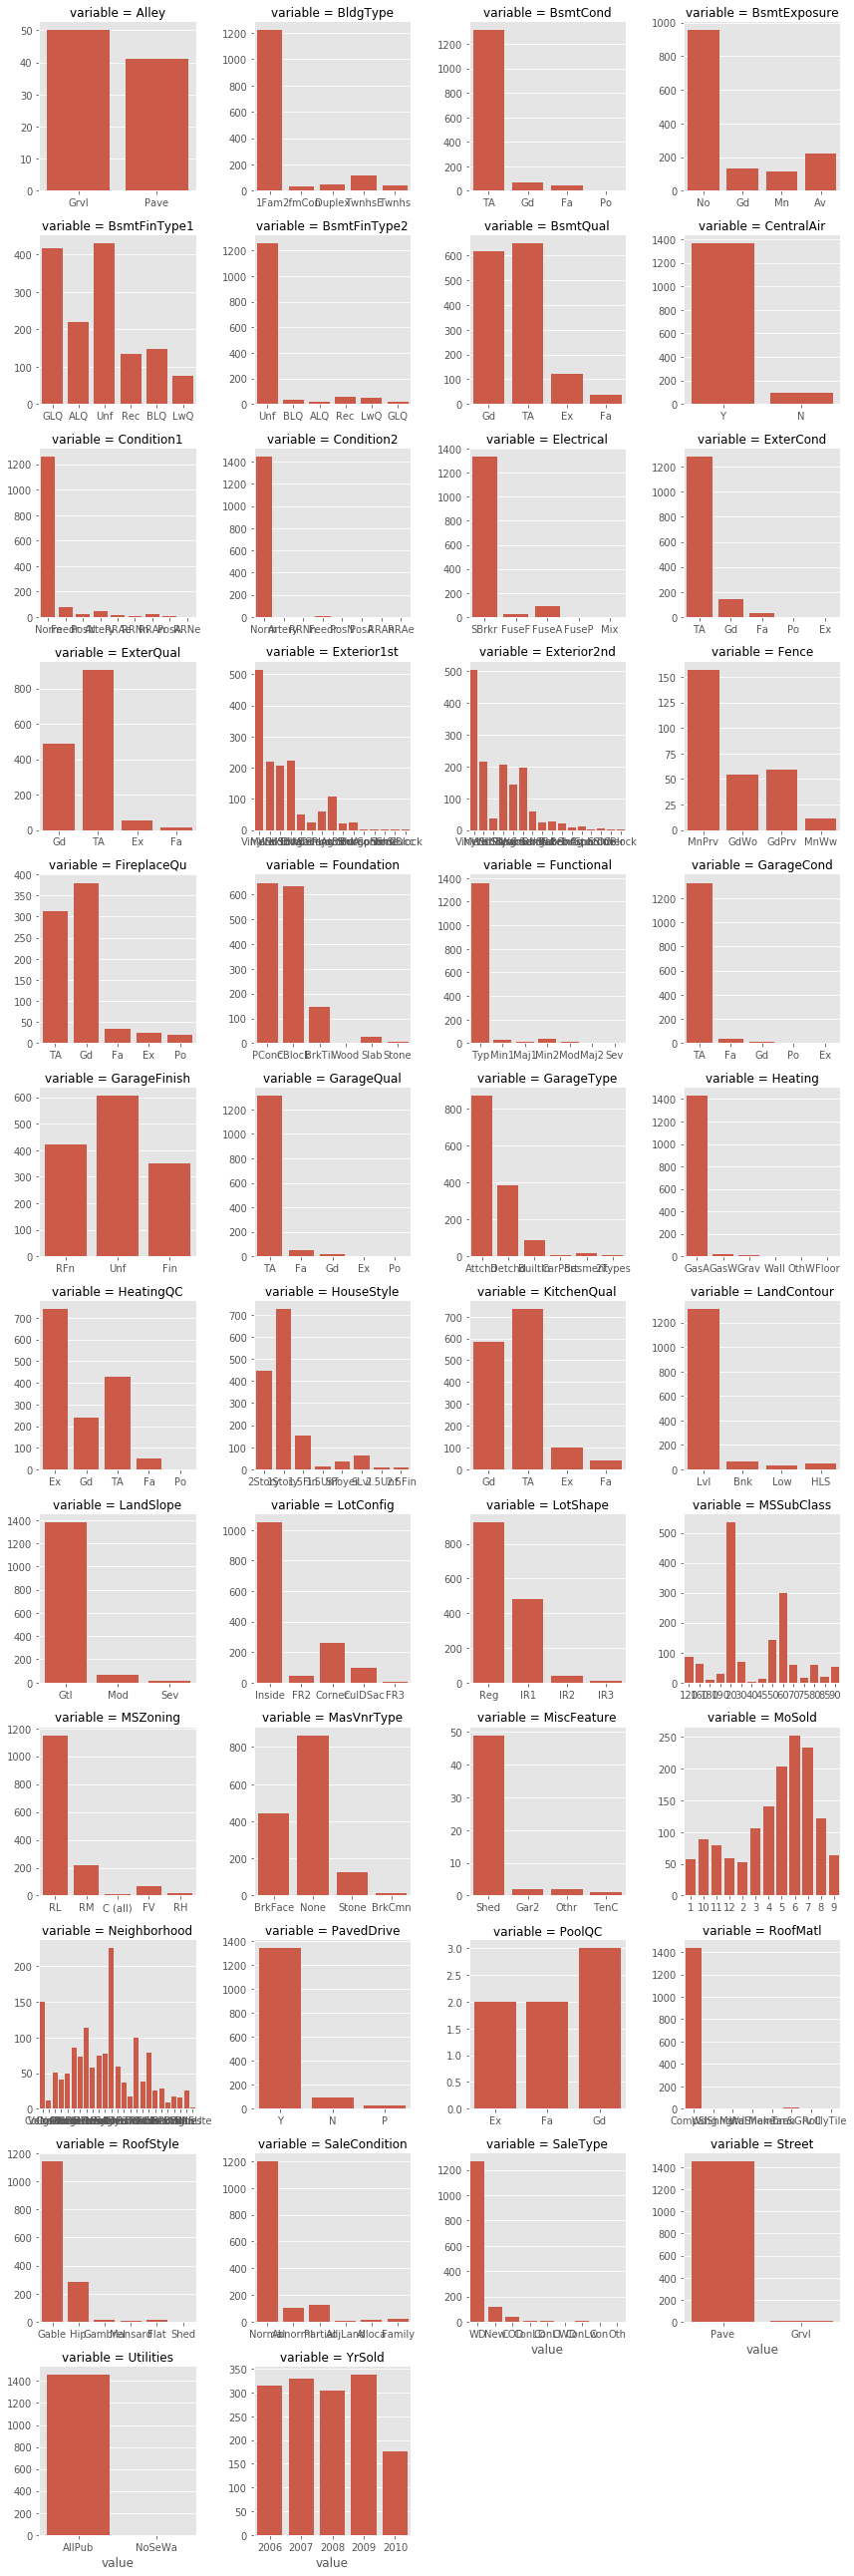

In [25]:
#catfeatures
#Count plots of categorical features
#draw barplots for all catfeatures to show highly overlypresented data
catvar = pd.melt(traindata, value_vars=sorted(catfeatures))
cvar = sns.FacetGrid(catvar, col='variable', col_wrap=4, sharex=False, sharey=False)
cvar = cvar.map(sns.countplot, 'value')


In [26]:
#Many of the categorical variables have overlypresented data...for example feature... Condition2.
#A number of categorical features actually contain ranked information in them 
#and should thus be converted to discrete quantitative features.
#Lets select these rank kind of features -  Alley, LotShape, LandContour, Utilities, LandSlope, ExterQual, 
#ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, 
#HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQuality, 
#GarageCond, PavedDrive, PoolQC







# Changing some features to nominal quantitative variables as they have class

In [27]:

#Checking the unique values of the column 'Alley' and converting it to ranked quantitative feature
#traindata.Alley.unique()
#traindata.LandContour.unique()
#traindata.LotShape.unique()

#traindata['Alley'].replace({np.nan:0,'Grvl':1,'Pave':2},inplace=True)
traindata['Alley'].replace({'Grvl':1,'Pave':2},inplace=True)
testdata['Alley'].replace({'Grvl':1,'Pave':2},inplace=True)
# #traindata["LotShape"]=traindata["LotShape"].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4})
# traindata["LandContour"]=traindata["LandContour"].replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4})
traindata.Alley.value_counts()

# # Lot Shape
traindata["LotShape"].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)
testdata["LotShape"].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)
#traindata["LotShape"]=traindata["LotShape"].replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4})
traindata.LotShape.value_counts()

traindata["LandContour"].replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)
testdata["LandContour"].replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)
traindata.LandContour.value_counts()

traindata["Utilities"].replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)
testdata["Utilities"].replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)
traindata["Utilities"].value_counts()

# # Land Slope
traindata["LandSlope"].replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)
testdata["LandSlope"].replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

traindata.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
testdata.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

#traindata.ExterQual
# # Exterior Condition
traindata.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
testdata.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

#traindata.ExterCond
# # Basement Quality
traindata.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
testdata.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

#traindata.BsmtQual
# # Basement Condition
traindata.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
testdata.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

#traindata.BsmtCond
# # Basement Exposure
traindata.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)
testdata.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

#traindata.BsmtExposure
# # Finished Basement 1 Rating
traindata.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
testdata.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)


#traindata.BsmtFinType1
# # Finished Basement 2 Rating
traindata.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)
testdata.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# # Heating Quality and Condition
traindata.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
testdata.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# # Kitchen Quality
traindata.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
testdata.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# # Home functionality
traindata.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)
testdata.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# # Fireplace Quality
traindata.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
testdata.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# # Garage Finish
traindata.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)
testdata.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# # Garage Quality
traindata.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
testdata.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# # Garage Condition
traindata.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
testdata.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# # Paved Driveway
traindata.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)
testdata.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# # Pool Quality
traindata.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
testdata.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Update our list of numerical and categorical features
numfeatures, catfeatures = categorize_feature_groups()
testnumfeatures, testcatfeatures = testcategorize_feature_groups()

In [28]:
traindata.Heating.unique()
traindata.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

# Filling the missingness in the dataframes

In [29]:
#Seperating the categorical variables in a cat_var_df dataframe and checking for column wise distribution of null values

cat_var_df = traindata.select_dtypes(include=['object']).copy()
#cat_var_df
#df[['a', 'b']] = df[['a','b']].fillna(value=0)
traindata[['GarageType','Fence','MiscFeature']]=traindata[['GarageType','Fence','MiscFeature']].fillna(value=0)

In [30]:
#Filling the only none value in Electrical with the most common value 'SBrkr'
traindata[['Electrical']]=traindata[['Electrical']].fillna(value='SBrkr')

In [31]:
traindata[['MasVnrType']]=traindata[['MasVnrType']].fillna(value='None')

In [32]:
#print(cat_var_df.isnull().sum())

In [33]:
print(traindata.GarageType.unique())
print(traindata.Fence.unique())
print(traindata.MiscFeature.unique())
print(traindata.Electrical.unique())
print(traindata.MasVnrType.unique())
#print(traindata.MasVnrType.value_counts())
#print('Electrical',traindata.Electrical.value_counts())

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 0 'Basment' '2Types']
[0 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[0 'Shed' 'Gar2' 'Othr' 'TenC']
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
['BrkFace' 'None' 'Stone' 'BrkCmn']


In [34]:
print(cat_var_df.isnull().sum())


MSSubClass          0
MSZoning            0
Street              0
LotConfig           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
Foundation          0
Heating             0
CentralAir          0
Electrical          1
GarageType         81
Fence            1179
MiscFeature      1406
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
dtype: int64


# Scatterplot of numerical variables aganist SalePrice

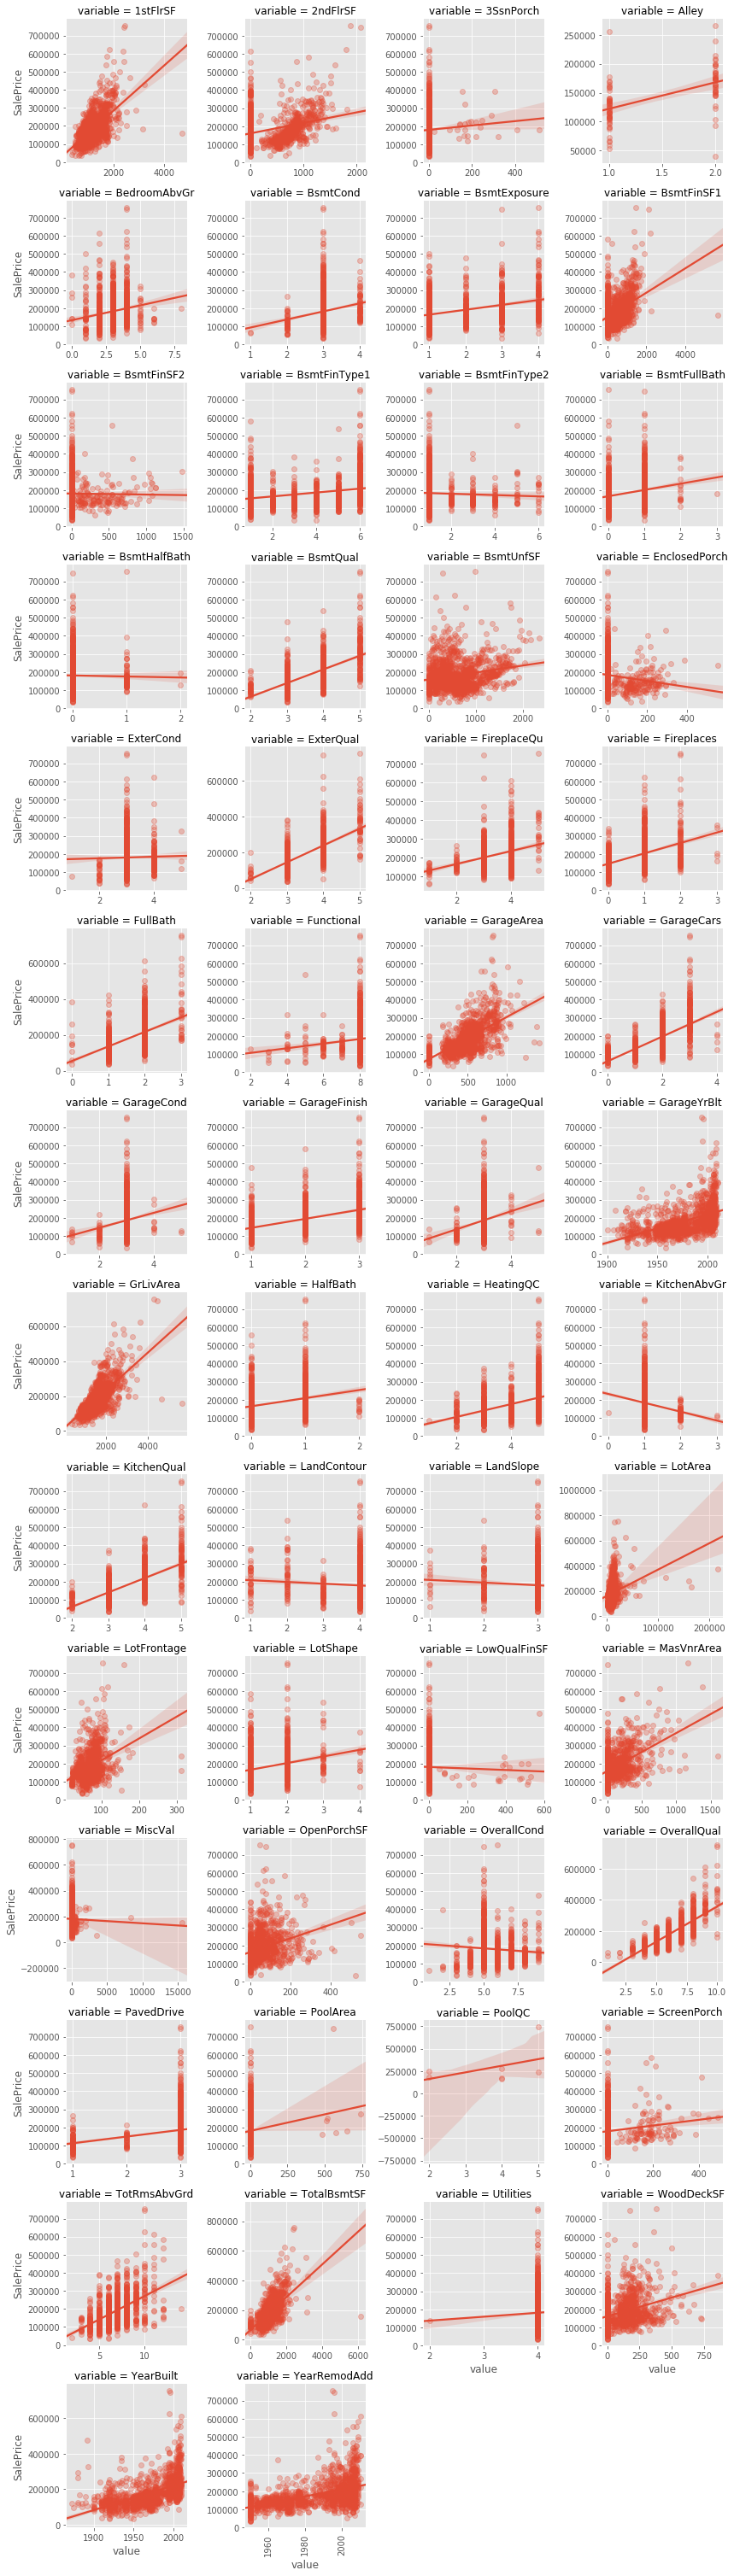

In [35]:
#Plotting the scatterplot for numerical variables aganist SalesPrice
varnumscatter = pd.melt(traindata, id_vars=['SalePrice'], value_vars=sorted(numfeatures))
numscatter = sns.FacetGrid(varnumscatter, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
numscatter = numscatter.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})


In [36]:
#We observe very strong correlations between some of the numeric features and the saleprice, 
#mainly OverallQual, TotalBsmtSF,GrLivArea, TotRmsAbvGrd. One would assume that a high quality,
#large squarefeet home along with a big basement and a high number of rooms would push the home price up.


# Correlation Matrix

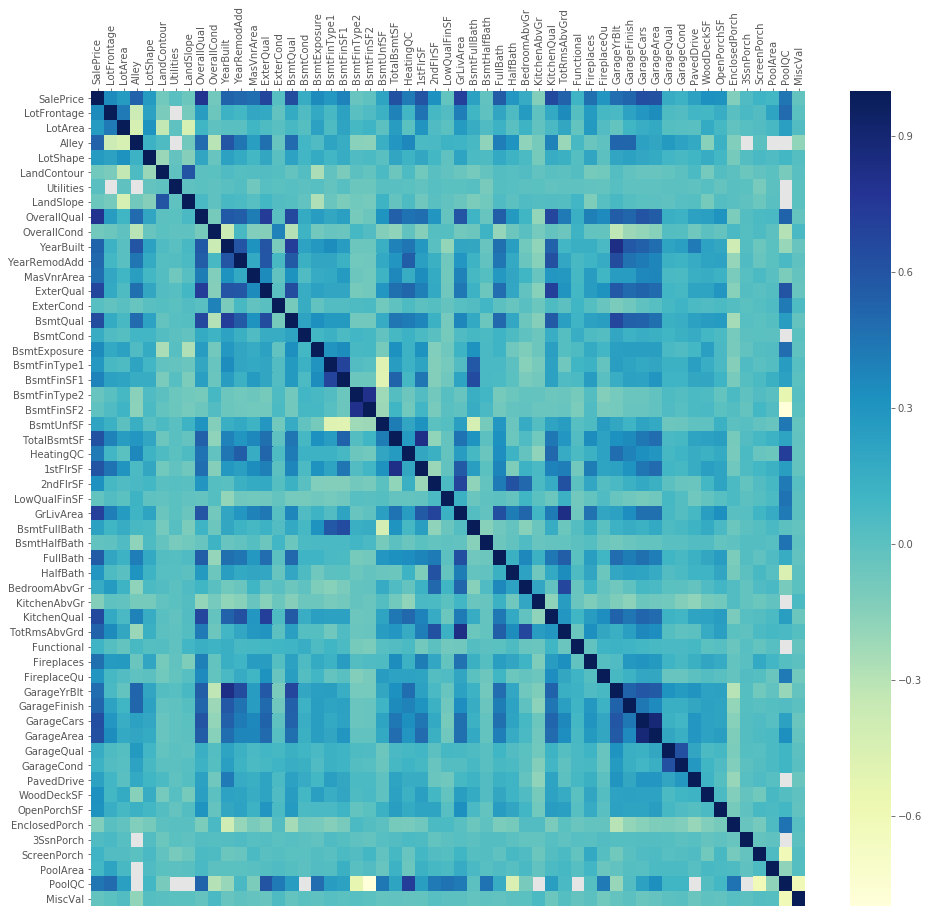

In [37]:
#Lets look at the  correlation between numerical features...Correlation Matrix

corr = traindata[['SalePrice'] + numfeatures].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap="YlGnBu")
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
#annot=True,fmt='.2f',
# learn to plot heatmaps....https://www.geeksforgeeks.org/exploring-correlation-in-python/

# Selecting features based on correlation

In [39]:
# Let us analyze the correlation between features, 
# we find that GarageYrBlt is highly correlated with 
# YearBuilt, which means that garages were built along with the house. 
# BsmtQual correlates with OverallQual and TotalBsmtSF correlates highly with 1stFlrSF,
# which both make a lot of sense. We also see that KitchenQual correlates highly with 
# ExteriorQual.GarageCars and GarageArea are highly correlated so we can drop GarageArea
corr.iloc[0]
#The closer ρ is to 1, the more an increase in one variable associates with an increase
#in the other. On the other hand, the closer ρ is to -1, the increase in one variable would result in decrease
#in the other. Note that if X and Y are independent, then ρ is close to 0, but not vice versa!


SalePrice        1.000000
LotFrontage      0.351799
LotArea          0.263843
Alley            0.534319
LotShape         0.267759
LandContour     -0.073042
Utilities        0.014314
LandSlope       -0.051152
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
ExterQual        0.682639
ExterCond        0.018899
BsmtQual         0.644019
BsmtCond         0.160658
BsmtExposure     0.352958
BsmtFinType1     0.277436
BsmtFinSF1       0.386420
BsmtFinType2    -0.040139
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
HeatingQC        0.427649
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
KitchenQual      0.659600
TotRmsAbvGrd     0.533723
Functional       0.107619
Fireplaces  

<function matplotlib.pyplot.show(*args, **kw)>

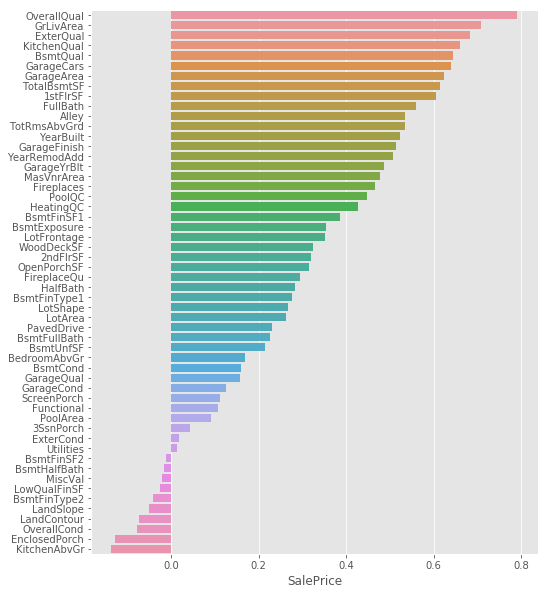

In [40]:
#Lets take a coorelation of the numeric variables with the saleprice by doing a barplot
corr=corr.sort_values('SalePrice',ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show

In [41]:
#SalePrice has a high correlation with OVerallQual and GrLivArea.ExterQual and KitchenQual are correlated to each other
#but both are highly correlated to SalePrice. ExterQual is also correlated to BsmtQual.In regression
#this could lead to multicollinearity.
#with these 3 Quality independent variables being correlated,  means these 3 variables are codependent. This can reduce 
#our overall 
#coefficient and pvalue to give us unpredictable variance.The model may fit very well on the training set but may overfit 
# on the unknown test set.Drop BsmtQual.


# BoxPlots of categorical variables

C:\Users\malco\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\malco\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


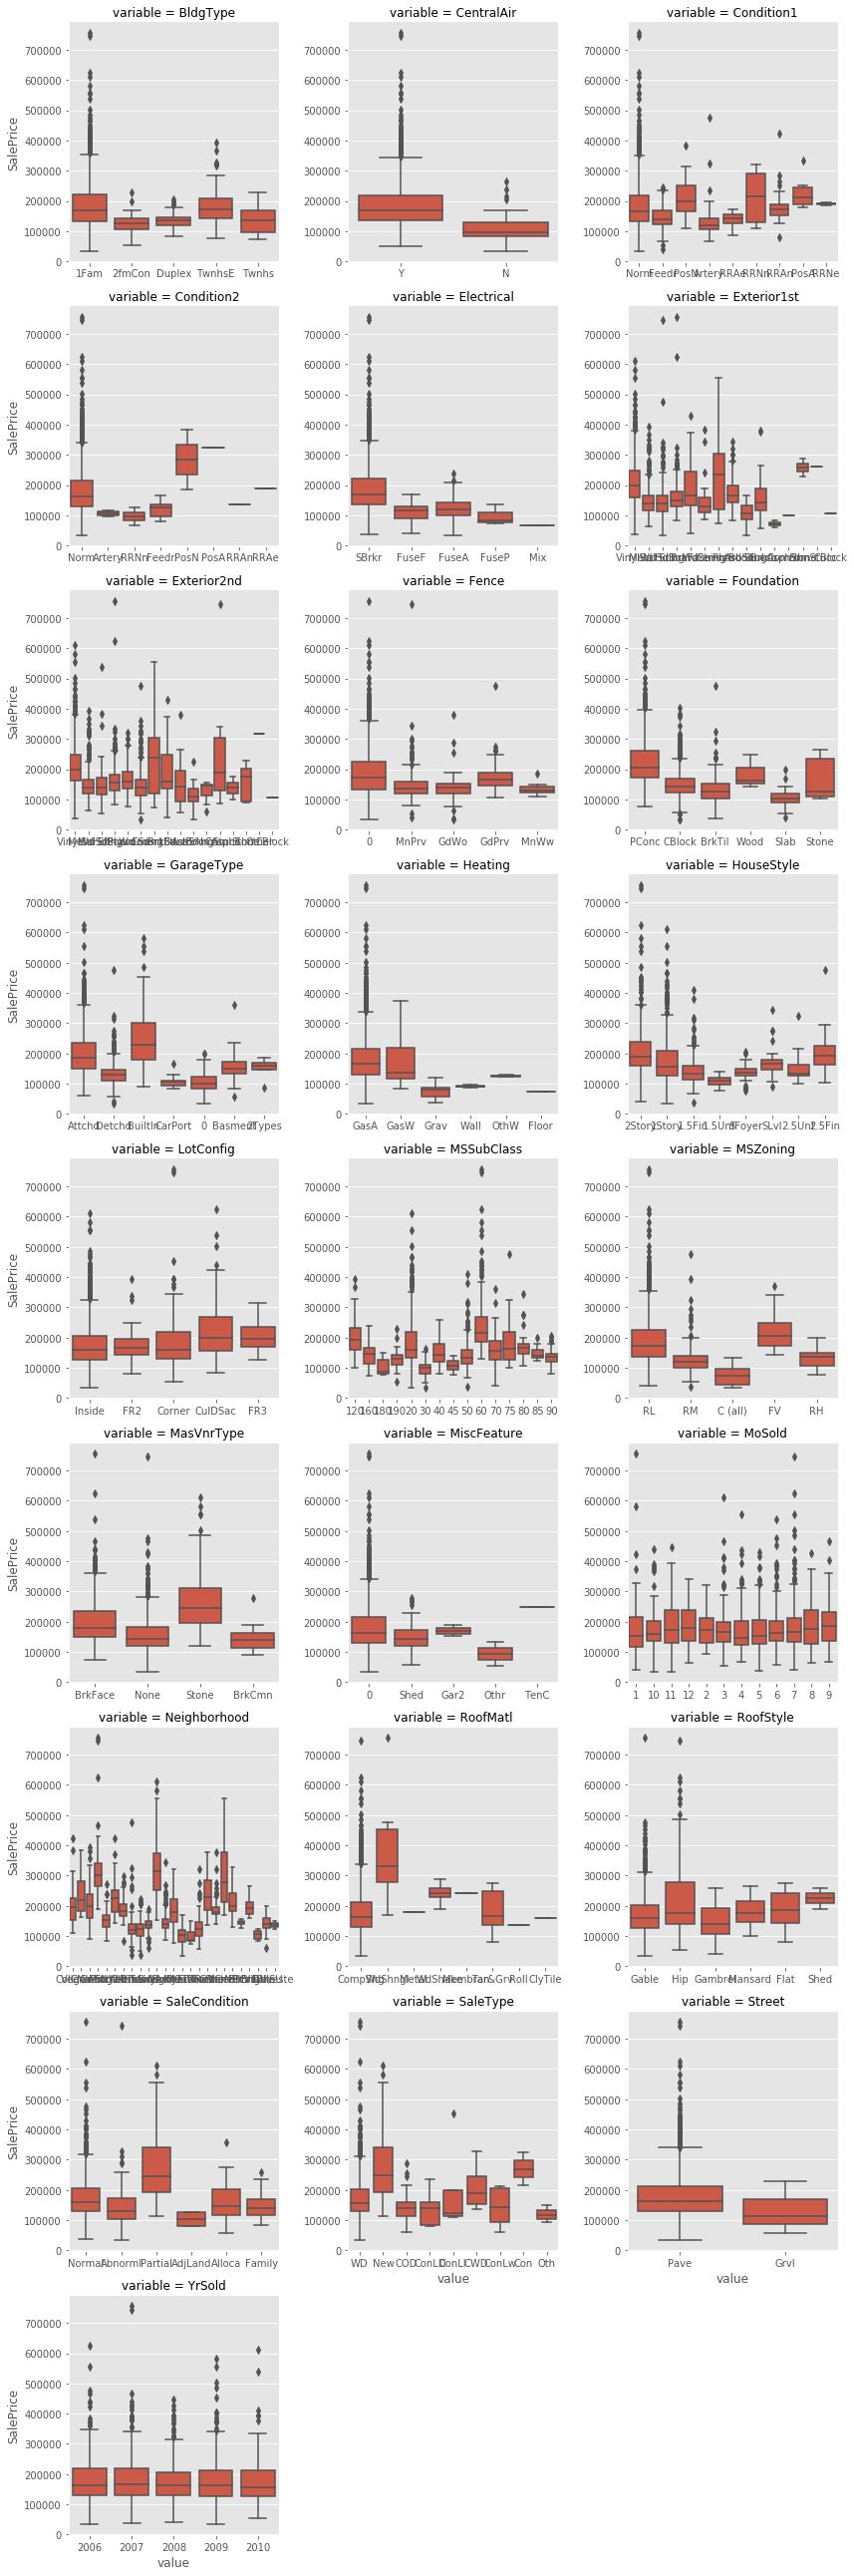

In [42]:
#sns.set_style("whitegrid")   
catvarbox= pd.melt(traindata, id_vars=['SalePrice'], value_vars=sorted(catfeatures))
boxcat = sns.FacetGrid(catvarbox, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
boxcat = boxcat.map(sns.boxplot, 'value', 'SalePrice')

# Feature Selection

In [43]:
#Analyzing the variable PoolQC, the maximum number of values are missing for this feature so dropping it off
#traindata.dtypes
num_var_df = traindata.select_dtypes(include=['int64','float64']).copy()
#num_var_df
#traindata.PoolQC.value_counts()
#traindata[['PoolQC']]=traindata[['PoolQC']].fillna(value=0)
#traindata.PoolQC.unique()
#print(num_var_df.isnull().sum())

In [44]:
#PoolQC has 1453 missing values out of 1460, we will drop this column.
#Dropping Street column after analyzing the values...Street has 1454 Pave and 6 Grvl
#traindata.Street.value_counts()
#traindata.Street.dtype
#Analyzing the correlation value from the first row of the heat matrix, decided to drop some columns
traindata=traindata.drop(['Alley','KitchenQual',"BldgType", 'HouseStyle', 'RoofMatl','MiscFeature','LotFrontage','PoolQC','Fence','FireplaceQu','GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual','MasVnrType','MasVnrArea','Utilities','Street','LotShape','ExterCond','LowQualFinSF','EnclosedPorch','ScreenPorch','3SsnPorch','MiscVal','PavedDrive','GarageArea'],axis=1)



In [45]:

testdata=testdata.drop(['Alley','KitchenQual',"BldgType",'HouseStyle','RoofMatl','MiscFeature','LotFrontage','PoolQC','Fence','FireplaceQu','GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond','BsmtQual','MasVnrType','MasVnrArea','Utilities','Street','LotShape','ExterCond','LowQualFinSF','EnclosedPorch','ScreenPorch','3SsnPorch','MiscVal','PavedDrive','GarageArea'],axis=1)
testdata.shape
testnumfeatures,testcatfeatures=testcategorize_feature_groups()

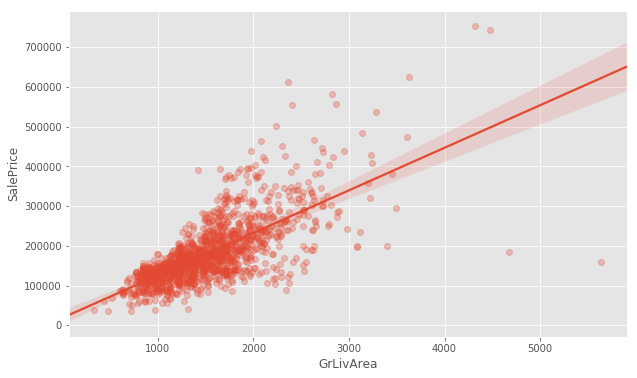

In [46]:
#Outliers for GrLivArea, we dispose out values more than 4000sq feet.

numfeatures, catfeatures = categorize_feature_groups()
#print(traindata.isnull().sum())
plt.figure(figsize=(10,6))
sns.regplot(traindata.GrLivArea, traindata.SalePrice, scatter_kws={'alpha':0.3})
plt.show()

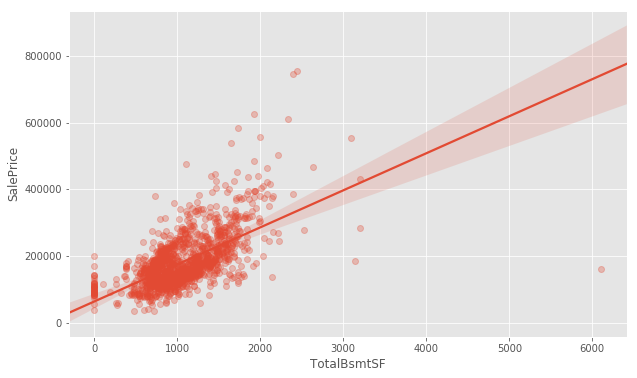

In [47]:
#Outliers for TotalBsmtSF, we dispose out values more than 3000sq feet.
plt.figure(figsize=(10,6))
sns.regplot(traindata.TotalBsmtSF, traindata.SalePrice, scatter_kws={'alpha':0.3})
plt.show()

In [48]:
print(catfeatures,numfeatures)
traindata.Condition1.unique()
traindata.shape
traindata.head()


['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'] ['LotArea', 'LandContour', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea']


,MSSubClass,MSZoning,LotArea,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,OverallQual,...,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,4,Inside,3,CollgCr,Norm,Norm,7,...,0,2,0,61,0,2,2008,WD,Normal,208500
2,20,RL,9600,4,FR2,3,Veenker,Feedr,Norm,6,...,1,2,298,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,4,Inside,3,CollgCr,Norm,Norm,7,...,1,2,0,42,0,9,2008,WD,Normal,223500
4,70,RL,9550,4,Corner,3,Crawfor,Norm,Norm,7,...,1,3,0,35,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,4,FR2,3,NoRidge,Norm,Norm,8,...,1,3,192,84,0,12,2008,WD,Normal,250000


In [49]:
print(testcatfeatures,testnumfeatures)
testdata.shape
#testdata.head()
#testdata.Condition1.unique()
#testdata.dtypes

['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'] ['LotArea', 'LandContour', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea']


(1459, 46)

# Combining Features

In [50]:
#Combine features for train and test datasets
traindata.TotRmsAbvGrd.unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14], dtype=int64)

In [51]:
traindata["OthrRmsAbvGrd"] = traindata.TotRmsAbvGrd - traindata.KitchenAbvGr - traindata.BedroomAbvGr
traindata['Total_Porch_SF'] = traindata['WoodDeckSF']+traindata['OpenPorchSF']
traindata['TotalSf'] = traindata['TotalBsmtSF'] + traindata['GrLivArea']
traindata['TotalBath'] = traindata['FullBath'] + traindata['BsmtFullBath'] + (0.5*traindata['HalfBath']) + (0.5*traindata['BsmtHalfBath'])
traindata['Pool'] = traindata['PoolArea'].apply(lambda x: 1 if x>0 else 0)

#These are being dropped because they're combined into new columns or because of very little correlation
traindata = traindata.drop(['TotRmsAbvGrd',  \
              'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF',\
               'Condition1','Condition2','FullBath','BsmtFullBath','HalfBath','BsmtHalfBath',\
                    'BsmtUnfSF','PoolArea','LandSlope',\
                         'GrLivArea'], axis = 1)


In [52]:
testdata["OthrRmsAbvGrd"] = testdata.TotRmsAbvGrd - testdata.KitchenAbvGr - testdata.BedroomAbvGr
testdata['Total_Porch_SF'] = testdata['WoodDeckSF']+testdata['OpenPorchSF']
testdata['TotalSf'] = testdata['TotalBsmtSF'] + testdata['GrLivArea']
testdata['TotalBath'] = testdata['FullBath'] + testdata['BsmtFullBath'] + (0.5*testdata['HalfBath']) + (0.5*testdata['BsmtHalfBath'])
testdata['Pool'] = testdata['PoolArea'].apply(lambda x: 1 if x>0 else 0)

#These are being dropped because they're combined into new columns or because of very little correlation
testdata = testdata.drop(['TotRmsAbvGrd',  \
              'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF',\
               'Condition1','Condition2','FullBath','BsmtFullBath','HalfBath','BsmtHalfBath',\
                    'BsmtUnfSF','PoolArea','LandSlope',\
                         'GrLivArea'], axis = 1)

In [53]:
traindata.shape


(1460, 36)

In [54]:
testdata.shape
print(traindata.columns)
print(testdata.columns)


Index(['MSSubClass', 'MSZoning', 'LotArea', 'LandContour', 'LotConfig',
       'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BedroomAbvGr', 'KitchenAbvGr',
       'Functional', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice', 'OthrRmsAbvGrd',
       'Total_Porch_SF', 'TotalSf', 'TotalBath', 'Pool'],
      dtype='object')
Index(['MSSubClass', 'MSZoning', 'LotArea', 'LandContour', 'LotConfig',
       'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BedroomAbvGr', 'KitchenAbvGr',
       'Functional', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold',
  

In [55]:
#Check missing values and dummify it and transform sale price with log
print(testdata.isnull().sum())


MSSubClass        0
MSZoning          4
LotArea           0
LandContour       0
LotConfig         0
Neighborhood      0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       1
Exterior2nd       1
ExterQual         0
Foundation        0
BsmtFinSF1        1
BsmtFinSF2        1
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
BedroomAbvGr      0
KitchenAbvGr      0
Functional        2
Fireplaces        0
GarageCars        1
MoSold            0
YrSold            0
SaleType          1
SaleCondition     0
OthrRmsAbvGrd     0
Total_Porch_SF    0
TotalSf           1
TotalBath         2
Pool              0
dtype: int64


In [56]:
#testdata.MSZoning.unique()
#testdata.MSZoning.value_counts()
#RL is the most common replacing missing values in test data with RL
testdata['MSZoning'].replace({np.nan:'RL'},inplace=True)
testdata.MSZoning.unique()
#traindata.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

array(['RH', 'RL', 'RM', 'FV', 'C (all)'], dtype=object)

In [57]:
#Checking for missing values in testdata and Replacing all nan values with the maximum class

#testdata.Exterior1st.value_counts()
#testdata.Exterior2nd.value_counts()
#testdata.BsmtFinSF1.value_counts()
#testdata.BsmtFinSF2.value_counts()
#testdata.Functional.value_counts()
#testdata.GarageCars.value_counts()
#testdata.SaleType.value_counts()
# testdata.TotalSf.value_counts()
#testdata.TotalBath.value_counts()

testdata['Exterior1st'].replace({np.nan:'VinylSd'},inplace=True)
testdata['Exterior2nd'].replace({np.nan:'VinylSd'},inplace=True)
testdata['BsmtFinSF1'].replace({np.nan:0},inplace=True)
testdata['BsmtFinSF2'].replace({np.nan:0},inplace=True)
testdata['Functional'].replace({np.nan:8.0},inplace=True)
testdata['GarageCars'].replace({np.nan:2.0},inplace=True)
testdata['SaleType'].replace({np.nan:'WD'},inplace=True)
testdata['TotalSf'].replace({np.nan:0},inplace=True)
testdata['TotalBath'].replace({np.nan:2.0},inplace=True)

#print(testdata.isnull().sum())
#traindata.SalePrice

In [58]:
#Drop SalePrice column and save it in y, Also Drop Id column
y = traindata['SalePrice']
traindata.drop('SalePrice', axis=1, inplace=True)
#traindata.drop('Id', axis=1, inplace=True)


# Dummification

In [59]:
#Dummify all categorical variables for trainset
allcategorical = traindata.select_dtypes(exclude=[np.number]).columns
mergedCat = traindata[allcategorical]
mergedCat = pd.get_dummies(mergedCat,drop_first=True)
dummifiedfull = pd.concat([traindata,mergedCat],axis=1)
dummifiedfull = dummifiedfull.drop(allcategorical,axis=1)
print(dummifiedfull.columns)
print(dummifiedfull.shape)
#model_data = pd.get_dummies(traindata).copy()


Index(['LotArea', 'LandContour', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtFinSF1', 'BsmtFinSF2', 'HeatingQC',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=143)
(1460, 143)


In [60]:
#Dummify all categorical variables for testset
testallcategorical = testdata.select_dtypes(exclude=[np.number]).columns
testmergedCat = testdata[testallcategorical]
testmergedCat = pd.get_dummies(testmergedCat,drop_first=True)
testdummifiedfull = pd.concat([testdata,testmergedCat],axis=1)
testdummifiedfull = testdummifiedfull.drop(testallcategorical,axis=1)
print(testdummifiedfull.shape)

#print([testdummifiedfull.columns])
testy= (list(sorted(testdummifiedfull.columns)))
trainy= (list(sorted(dummifiedfull.columns)))
new_list = set(trainy).difference(testy)
print(new_list)
#print(testdummifiedfull.shape)
#model_data = pd.get_dummies(traindata).copy()
#testdummifiedfull.head()

def returnNotMatches(trainy, testy):
    return [[x for x in trainy if x not in testy], [x for x in testy if x not in trainy]]

print(returnNotMatches(trainy, testy))
dummifiedfull['MSSubClass_150'] = 0
testdummifiedfull['Exterior_ImStucc']= 0
testdummifiedfull['Electrical_Mix']=0
testdummifiedfull['Heating_OthW']=0
testdummifiedfull['Heating_GasA']=0
testdummifiedfull['Exterior1st_Stone']=0
testdummifiedfull['Exterior2nd_Other']=0
print(testdummifiedfull.shape)
print(dummifiedfull.shape)

(1459, 138)
{'Heating_GasA', 'Heating_OthW', 'Exterior1st_ImStucc', 'Electrical_Mix', 'Exterior2nd_Other', 'Exterior1st_Stone'}
[['Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_GasA', 'Heating_OthW'], ['MSSubClass_150']]
(1459, 144)
(1460, 144)


# Log of SalePrice

In [61]:
Logsaleprice=np.log(y)
# print(traindata.shape)
# print(testdata.shape)
# print(Logsaleprice)

In [62]:
dummifiedfull.head()
y=pd.DataFrame(y)#this is the saleprice
Logsaleprice=pd.DataFrame(Logsaleprice)#Taking the log of the saleprice
type(Logsaleprice)

pandas.core.frame.DataFrame

In [63]:
#testdummifiedfull.head
# testdummifiedfull.columns

# Linear Regression

In [64]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression,HuberRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
ols=LinearRegression()
ols.fit(dummifiedfull,Logsaleprice)
ols.score(dummifiedfull,Logsaleprice)#this is Rsquare
pred_lm_all=ols.predict(testdummifiedfull)
#print(pred_lm_all)

In [65]:
submit_lm = pd.DataFrame()
submit_lm['Id'] = testdummifiedfull.index
submit_lm['SalePrice'] = pred_lm_all
submit_lm['SalePrice'] = np.exp(submit_lm['SalePrice'])
submit_lm.to_csv('submit_lm.csv', index=False)

# Ridge Regression

In [67]:
n_cv = 5
def cv_best_score(grid):  
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    #print(grid.best_params_)
    #print(grid.best_estimator_)
    return best_score
score_calc = 'neg_mean_squared_error'
ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv = n_cv, verbose = 1, scoring = score_calc)
grid_ridge.fit(dummifiedfull,Logsaleprice)
sc_ridge = cv_best_score(grid_ridge)
pred_ridge_all = grid_ridge.predict(testdummifiedfull)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.1429198825951797


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    4.8s finished


In [68]:
submit_ridge = pd.DataFrame()
submit_ridge['Id'] = testdummifiedfull.index
submit_ridge['SalePrice'] = pred_ridge_all
submit_ridge['SalePrice'] = np.exp(submit_ridge['SalePrice'])
submit_ridge.to_csv('submit_ridge.csv',index = False)

# Lasso Regression

In [69]:

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(dummifiedfull.values)
    rmse= np.sqrt(-cross_val_score(model, dummifiedfull.values, Logsaleprice, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



C:\Users\malco\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d



Lasso score: 0.1409 (0.0234)



In [70]:
lasso = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso, parameters, cv = n_cv, verbose = 1, scoring = score_calc)
grid_lasso.fit(dummifiedfull,Logsaleprice)
sc_lasso = cv_best_score(grid_lasso)
pred_lasso_all = grid_lasso.predict(testdummifiedfull)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.1442933009940484


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    7.9s finished


In [71]:
submit_lasso = pd.DataFrame()
submit_lasso['Id'] = testdummifiedfull.index
submit_lasso['SalePrice'] = pred_lasso_all
submit_lasso['SalePrice'] = np.exp(submit_lasso['SalePrice'])
submit_lasso.to_csv('submit_lasso.csv',index=False)

# Kernel Ridge

In [72]:

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
KRR.fit(dummifiedfull,Logsaleprice)
pred_KRR_all = KRR.predict(testdummifiedfull)
submit_KRR = pd.DataFrame()
submit_KRR['Id'] = testdummifiedfull.index
submit_KRR['SalePrice'] = pred_KRR_all
submit_KRR['SalePrice'] = np.exp(submit_KRR['SalePrice'])
submit_KRR.to_csv('submit_KRR.csv',index=False)

C:\Users\malco\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.273857e-19
  overwrite_a=False)
C:\Users\malco\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.390586e-19
  overwrite_a=False)
C:\Users\malco\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.127135e-19
  overwrite_a=False)
C:\Users\malco\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.020517e-19
  overwrite_a=False)
C:\Users\mal

Kernel Ridge score: 0.3110 (0.0799)



C:\Users\malco\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:152: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.217276e-20
  overwrite_a=False)


# Elastic Net Regression

In [73]:

ENet=make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print(score)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))                                               
                                                   
ENet.fit(dummifiedfull,Logsaleprice)
pred_enet =ENet.predict(testdummifiedfull)                                        
submit_enet = pd.DataFrame()
submit_enet['Id'] = testdummifiedfull.index
submit_enet['SalePrice'] = pred_enet
submit_enet['SalePrice'] = np.exp(submit_enet['SalePrice'])
submit_enet.to_csv('submit_enet.csv',index = False)

[0.12166525 0.14380672 0.13331245 0.12150808 0.18445113]
ElasticNet score: 0.1409 (0.0233)

